In [22]:
from sklearn.datasets import make_regression
import numpy as np

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### **Gradient Descent for 1 unknown (intercept)**

In [23]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20,random_state=13)

In [24]:
lr = LinearRegression()

In [25]:
lr.fit(X, y)

LinearRegression()

In [26]:
m = lr.coef_[0]
b = lr.intercept_

print(m, b)

27.82809103252014 -2.29474455867698


#### Gradient Descent Class
- Setting m = 27.82
- b = 0 (randomly)

Here  I'm using b_old - b_new <= 0.0001 approach and not epochs approach

In [27]:
class gradient_descent:
    def __init__(self) -> None:
        self.m = 27.82
        self.b = 0
        self.learning_rate = 0.0001
    
    def fit(self, X_train, y_train):
        difference = 100

        slope_values, b_vales = [], []

        while difference >= 0.001:
            slope = -2 * np.sum(y_train - (self.m * X_train.reshape(100)) - self.b)
            b_new = self.b - (self.learning_rate * slope)
            difference = np.abs(b_new - self.b)
            self.b = b_new

            loss_value = np.sum(y_train - (self.m * X_train) - self.b)**2

            slope_values.append(loss_value)
            b_vales.append(self.b)
        
        return slope_values, b_vales
    
    def predict(self, X_train):
        y_pred = self.m * X_train + self.b
        return y_pred

In [28]:
model = gradient_descent()

In [29]:
slopes, b_vals = model.fit(X, y)

#### This plot represents how the value of b(intercept) is converging towards minima

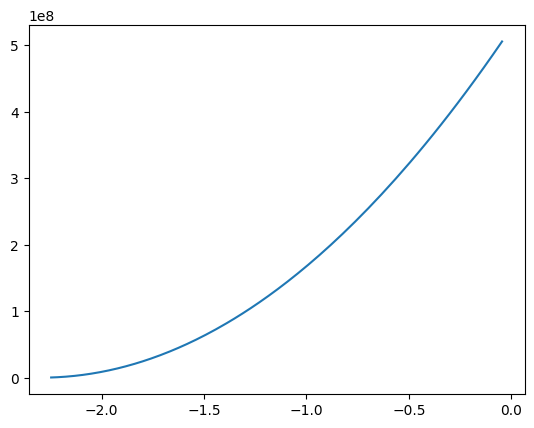

In [30]:
plt.plot(b_vals, slopes)
plt.show()

In [31]:
model.b

-2.2458742117374646

In [32]:
y_pred = model.predict(X)

In [33]:
r2_score(y_pred, y)

0.5783240084675862